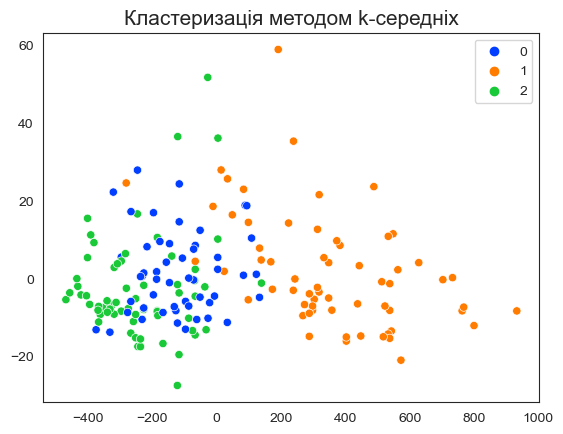

In [159]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer

df_wine = datasets.load_wine()

yeojohnson = ColumnTransformer([
    ('ptransform',PowerTransformer(method='yeo-johnson', standardize=False), slice(0,13))
])

scaling = ColumnTransformer([
    ('scale',StandardScaler(), slice(0,13))
])

pipe = Pipeline([
    ('yeojohnson',yeojohnson),
    ('scaling',scaling)
])
wine_transformed = pipe.fit_transform(df_wine.data)

model_KMeans = KMeans(n_clusters=3).fit(wine_transformed) 
predictions = model_KMeans.predict(wine_transformed)

pca = PCA(n_components=2).fit(df_wine.data)
wine_pca = pca.fit_transform(df_wine.data)

sns.set_style('white')
plt.figure()
sns.scatterplot(hue=predictions, x=wine_pca[:,0], y=wine_pca[:,1], palette="bright")
plt.title("Кластеризація методом k-середніх", fontsize=15)
plt.show()


4 24 18 112 12


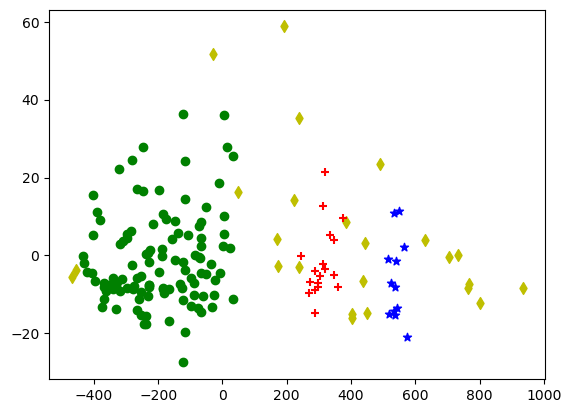

In [133]:
dbscan = DBSCAN(eps=27, min_samples=5)
dbscan.fit(df_wine.data)
pca = PCA(n_components=3).fit(df_wine.data)
pca_2d = pca.transform(df_wine.data)

for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == 2:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')
    elif dbscan.labels_[i] == -1:
        c4 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='y', marker='d')

labels = dbscan.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)
n_1 = list(labels).count(0)
n_2 = list(labels).count(1)
n_3 = list(labels).count(2)

print(n_clusters , n_noise , n_1, n_2 , n_3)